In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [80]:
# Load dataset
file_path = "/content/dataset.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")
print(df)

    Sno  width  Length
0     1    3.7    19.4
1     2    2.9    15.3
2     3    3.9    22.6
3     4    2.2    18.3
4     5    3.0    19.3
5     6    2.3    11.5
6     7    2.4    11.7
7     8    3.4    22.7
8     9    2.3    13.4
9    10    1.8    10.7
10   11    3.1    19.7
11   12    2.5    16.5
12   13    2.2    13.2
13   14    3.6    19.7
14   15    3.6    20.5
15   16    5.0    14.5
16   17    4.6    12.5
17   18    5.1    13.2
18   19    3.8    11.0
19   20    5.4    12.2
20   21    3.4     8.7
21   22    4.6    10.2
22   23    3.0     6.7
23   24    4.8    12.2
24   25    5.6    14.3
25   26    4.8    11.0
26   27    2.7    11.7
27   28    4.6    18.0
28   29    4.5    16.2
29   30    5.2    18.7
30   31    3.8    15.2
31   32    4.8     9.0
32   33    5.6    10.0
33   34    6.4    11.0
34   35    5.8    10.8
35   36    4.0     8.5
36   37    7.8    16.3
37   38    5.8     9.7
38   39    8.7    13.5


 Histogram between L&W



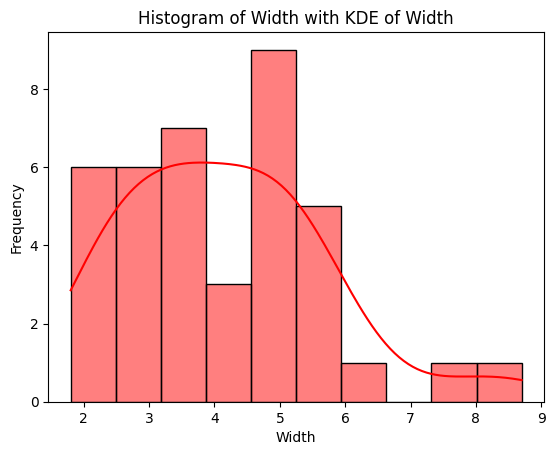

In [81]:
# Histogram with KDE of Width
sns.histplot(df['width'], bins=10, kde=True, color='red', edgecolor='black', alpha=0.5)
# Labels and title
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.title('Histogram of Width with KDE of Width')
plt.show()

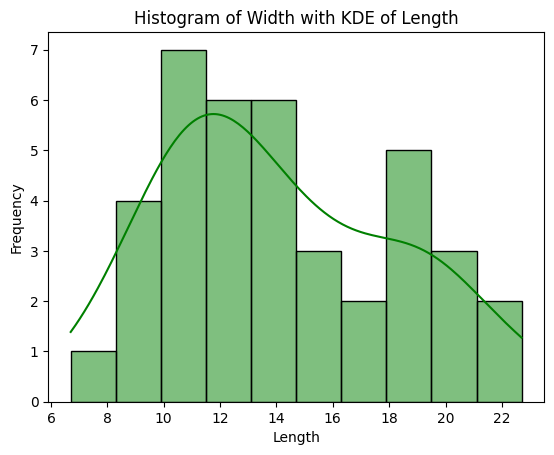

In [82]:
# Histogram with KDE of Length
sns.histplot(df['Length'], bins=10, kde=True, color='green', edgecolor='black', alpha=0.5)
# Labels and title
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Histogram of Width with KDE of Length')
plt.show()


Scatter plot

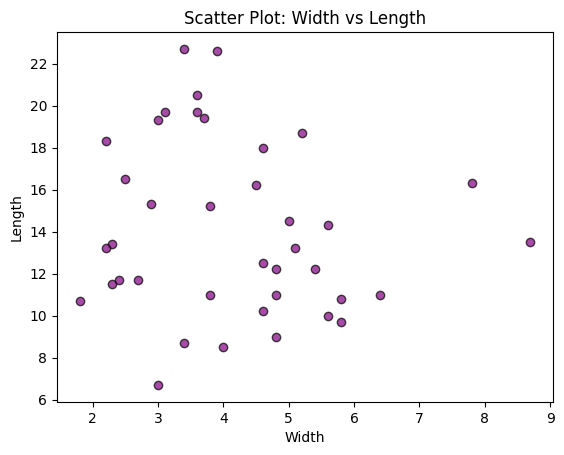

In [83]:
# Scatter Plot of Width vs Length
plt.figure()
plt.scatter(df['width'], df['Length'], color='purple', alpha=0.7, edgecolors='k')
plt.xlabel('Width')
plt.ylabel('Length')
plt.title('Scatter Plot: Width vs Length')
plt.show()

Clustering

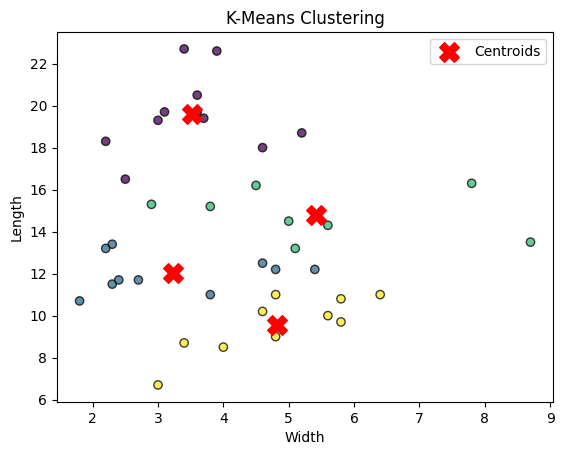

In [84]:
# Clustering (K-Means)
X_cluster = df[['width', 'Length']]
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_cluster)

plt.scatter(df['width'], df['Length'], c=df['Cluster'], cmap='viridis', edgecolors='k', alpha=0.75)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Width')
plt.ylabel('Length')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

Biggest Cluster: 0 with 11 points


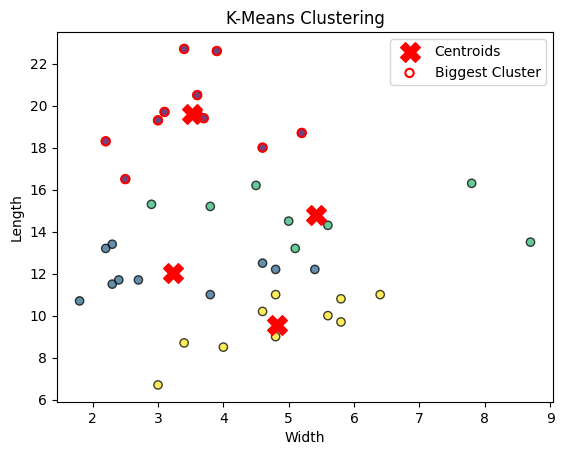

In [85]:
# Find the largest cluster
cluster_sizes = df['Cluster'].value_counts()
biggest_cluster = cluster_sizes.idxmax()
biggest_cluster_size = cluster_sizes.max()

print(f"Biggest Cluster: {biggest_cluster} with {biggest_cluster_size} points")

# Plotting
plt.scatter(df['width'], df['Length'], c=df['Cluster'], cmap='viridis', edgecolors='k', alpha=0.75)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')

# Highlight the biggest cluster
biggest_cluster_points = df[df['Cluster'] == biggest_cluster]
plt.scatter(biggest_cluster_points['width'], biggest_cluster_points['Length'],
            edgecolors='red', facecolors='none', linewidths=1.5, label='Biggest Cluster')

plt.xlabel('Width')
plt.ylabel('Length')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


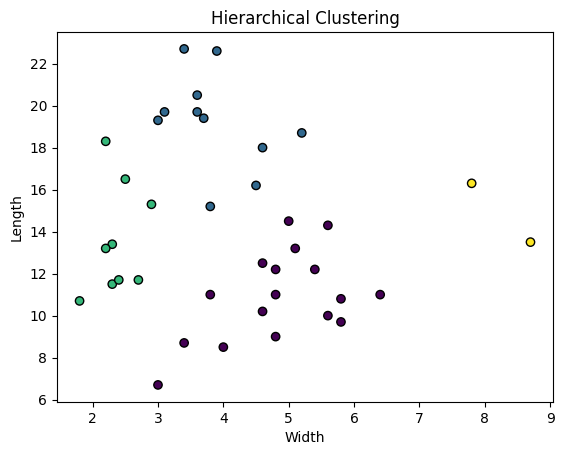

In [86]:
# Hierarchical Clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)
# Perform hierarchical clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
df['Hierarchical_Cluster'] = hierarchical_clustering.fit_predict(X_scaled)

# Plot the results
plt.scatter(df['width'], df['Length'], c=df['Hierarchical_Cluster'], cmap='viridis', edgecolors='k', alpha=1)
plt.xlabel('Width')
plt.ylabel('Length')
plt.title('Hierarchical Clustering')
plt.show()

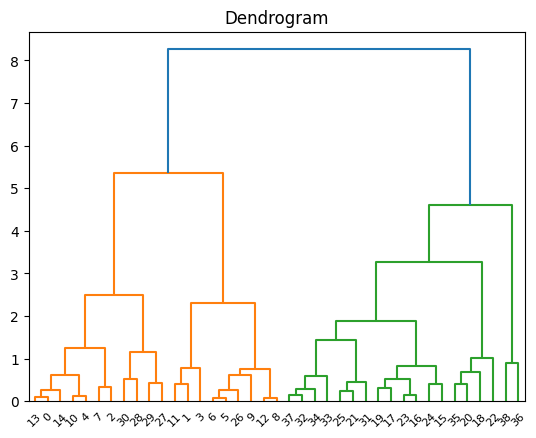

In [87]:
# Dendrogram
linked = linkage(X_scaled, 'ward')
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title("Dendrogram")
plt.show()

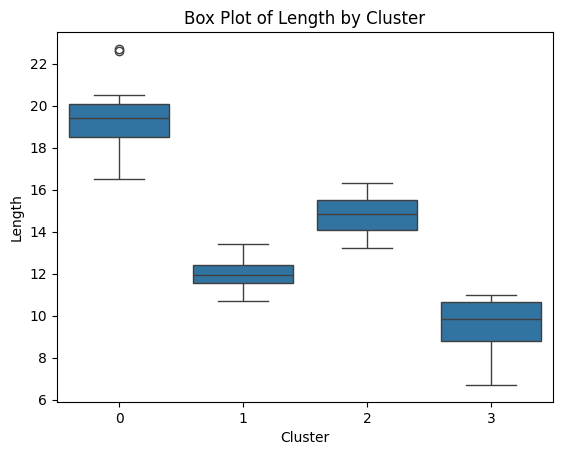

In [88]:
#Box plot of length by Cluster
sns.boxplot(x='Cluster', y='Length', data=df)
plt.title('Box Plot of Length by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Length')
plt.show()

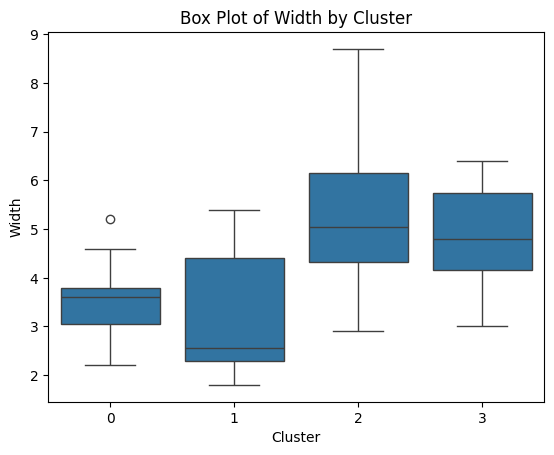

In [89]:
#Box plot of Width by Cluster
sns.boxplot(x='Cluster', y='width', data=df)
plt.title('Box Plot of Width by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Width')
plt.show()

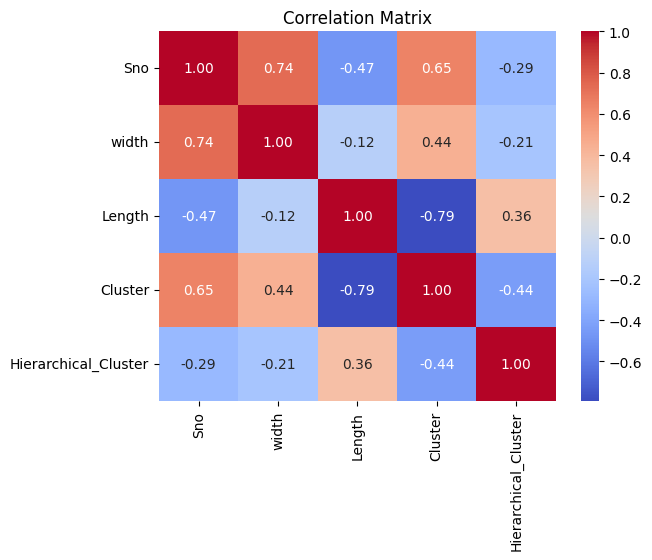

In [100]:
# Correlation Matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Regression

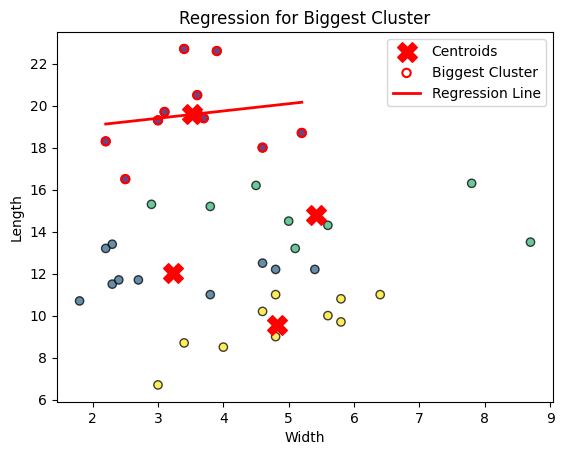

In [101]:
#Linear Regression for biggest cluster
# Extract data for the biggest cluster
biggest_cluster_points = df[df['Cluster'] == biggest_cluster]

# Fit a linear regression model
X = biggest_cluster_points[['width']].values  # Independent variable
y = biggest_cluster_points['Length'].values  # Dependent variable

regressor = LinearRegression()
regressor.fit(X, y)

# Predict values for regression line
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = regressor.predict(x_range)

# Plot clusters
plt.scatter(df['width'], df['Length'], c=df['Cluster'], cmap='viridis', edgecolors='k', alpha=0.75)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')

# Highlight the biggest cluster
plt.scatter(biggest_cluster_points['width'], biggest_cluster_points['Length'],
            edgecolors='red', facecolors='none', linewidths=1.5, label='Biggest Cluster')

# Plot regression line
plt.plot(x_range, y_pred, color='red', linewidth=2, label='Regression Line')

# Labels and title
plt.xlabel('Width')
plt.ylabel('Length')
plt.title('Regression for Biggest Cluster')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


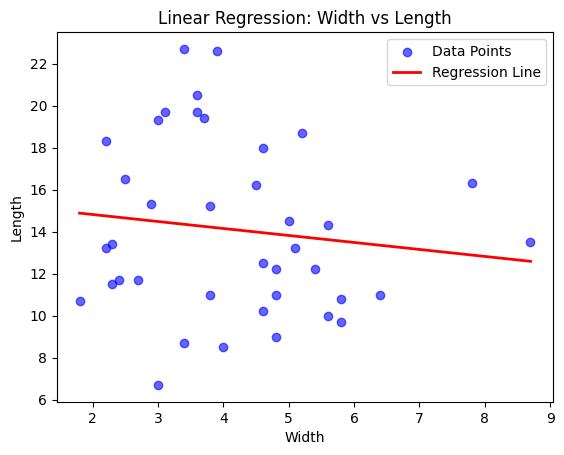

In [103]:
# Regression (Linear Regression on whole data)
X_reg = df[['width']]
y_reg = df['Length']
reg_model = LinearRegression()
reg_model.fit(X_reg, y_reg)
X_range = np.linspace(X_reg.min(), X_reg.max(), 100).reshape(-1, 1)
y_pred = reg_model.predict(X_range)

plt.scatter(df['width'], df['Length'], color='blue', label='Data Points', alpha=0.6)
plt.plot(X_range, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Width')
plt.ylabel('Length')
plt.title('Linear Regression: Width vs Length')
plt.legend()
plt.show()

 Classify (10+10) (Any 2 different methods)

In [93]:
# Given points and labels
X = np.array([[3, 19], [8, 16], [5, 13], [6, 9], [2, 11]])
y = np.array([0, 1, 0, 1, 0])  # Example labels (can be changed based on problem context)

# Test point to classify
test_point = np.array([[10, 10]])

In [94]:
# Method 1: K-Nearest Neighbors (KNN) with different k value
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
knn_pred = knn.predict(X)
print(f"KNN Prediction for {test_point[0]}: {knn.predict(test_point)[0]}")

KNN Prediction for [10 10]: 0


In [96]:
# Method 2: Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X, y)
dt_pred = dt.predict(X)
print(f"Decision Tree Prediction for {test_point[0]}: {dt.predict(test_point)[0]}")

Decision Tree Prediction for [10 10]: 1


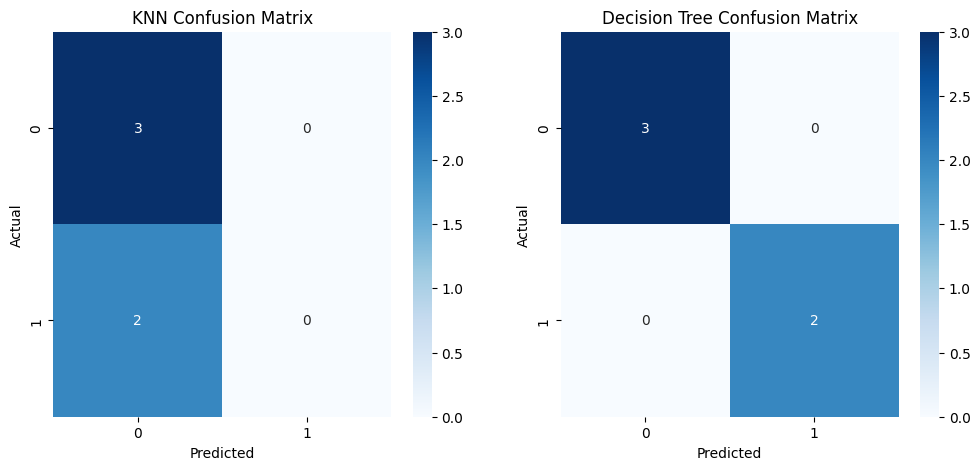

In [97]:
# Compute confusion matrices
knn_cm = confusion_matrix(y, knn_pred)
dt_cm = confusion_matrix(y, dt_pred)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("KNN Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title("Decision Tree Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
plt.show()

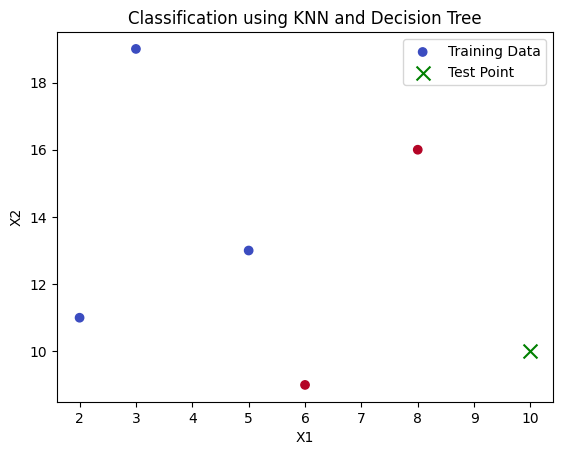

In [98]:
# Visualization
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', label='Training Data')
plt.scatter(test_point[:, 0], test_point[:, 1], color='green', marker='x', s=100, label='Test Point')
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("Classification using KNN and Decision Tree")
plt.show()